# National-Wheelchair Expense Analysis and Prediction

![wheel](AdobeStock.jpg)

***

##  <span style = 'color :cyan'>Background </span>

The landscape of healthcare services in England has seen a transformative shift with the increasing emphasis on enhancing patient experiences and outcomes. 

In this context, a prominent concern arises in the realm of wheelchair services – a critical aspect of healthcare accessibility for individuals with mobility challenges. 

To address this, the project aims to leverage modern data-driven techniques to develop an accurate predictive model for wheelchair services and outcomes costs across diverse regions of England.

***

##  <span style = 'color :cyan'>Problem Statement </span>

Amidst the intricate landscape of healthcare optimization, a formidable challenge emerges, demanding the creation of an innovative machine learning model that transcends the limitations of traditional predictive methodologies. 

The conventional predictive paradigms, while valuable, fall short in capturing the intricacies embedded within the multifaceted healthcare domain. 

The aspiration here is to engineer a predictive framework that not only surpasses existing models but also delves deep into the intricate fabric of healthcare dynamics, uncovering hidden patterns, correlations, and causal relationships that govern the complex interplay between medical services, patient outcomes, and resource allocation.


***

##  <span style = 'color :cyan'>Problem Objectives </span>


Analyze features including region, patient sign-ups, and new referrals to uncover their statistical significance and impact on the target metrics.

Address questions related to efficiently targeting specific patient groups to optimize the delivery of wheelchair services and improve outcomes.

Develop a predictive model to determine whether, given specific metrics, what would be the cost incurred to bring this services to patients and facilities alike


***

##  <span style = 'color :cyan'> Data Description </span>

The first consolidated national wheelchair dataset about wheelchair service costs, accessibility, volume, and patient experiences was made available by NHS England in 2015–16. 

It was intended to enhance benchmarking and transparency. This was crucial for enhancing the commissioning of wheelchair services as well as for enhancing wheelchair user outcomes.

The National Wheelchair Managers Forum, ICBs, wheelchair service providers, wheelchair users, and other important stakeholders provided extensive discussion and feedback that helped shape the data gathering questions.

Since July 2015, data has been gathered quarterly from ICBs (formerly known as clinical commissioning groups), and it assists the effort to improve wheelchair services.

Between July 2015 and June 2022, CCGs provided the data, which has since been replaced by Integrated Care Boards (ICBs) since July 2022. This information supports the need for better wheelchair services. 


***

##  <span style = 'color :cyan'> Variable Description </span>


1. The total number of patients currently registered with the service – split by adults and children?:
currently registered = Patients active with the service either through the long term loan of a piece of equipment or through an open episode of care

2. (A) The number of new patients referred to the service within the reporting period – split by adults and children?: 
    - New = New patients to the service ,Not a current active service user 
    - If the patient has previously been registered with the service but is ‘inactive’ and all equipment has been returned this is a new referral. 
    - If equipment is still on loan then this is a re-referral

3. The number of new patients (split by adults and children) whose episode of care was closed in the reporting period and is assessed as:
    - Low need 
    - Medium need 
    - High need 
    - Specialist need  
    - No equipment provided – patient is assessed as none required within the following timescales:
         - less than or equal to 18 weeks
         - more than 18 weeks
   
Closed episode of care = Patient pathway is complete, i.e. equipment, assessment, accessories or modification received by patient)

4. The number of re-referred patients (split by adults and children) whose episode of care was closed in the reporting period and is assessed as:
    - Low need 
    - Medium need 
    - High need 
    - Specialist need  
    - No equipment provided – patient is assessed as none required within the following timescales:
        - less than or equal to 18 weeks
                    
5. What is the current expenditure on wheelchair services annually by the clinical commissioning group?:Annual spend

6. Have you transitioned from a voucher system to personal wheelchair budgets?: Increased choice and control for patients

***

In [ ]:
# Loading the necessary libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
plt.style.use('bmh')
import time
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

>> ### 1. DATA UNDERSTANDING

In [961]:
# Loading the dataset and viewing first five columns

df = pd.read_csv("National-Wheelchair-Data-Collection-Results-Data-April-June-2023.csv")

df.head()

,ICB Code,ICB Name,Region Code,Region Name,Period,The total number of patients currently registered with the service_QWC001_AdultRegistered,The total number of patients currently registered with the service_QWC001_ChildRegistered,The number of new patients referred to the service within the reporting period_QWC002_AdultRegistered,The number of new patients referred to the service within the reporting period_QWC002_ChildRegistered,The number of patients re-referred to the service within the reporting period_QWC003_AdultRegistered,...,The number of re-referred patients whose episode of care was closed in the reporting period and is assessed as specialist need where equipment was delivered in 18 weeks or less_QWC0012_AdultReRef18OrLess,The number of re-referred patients whose episode of care was closed in the reporting period and is assessed as specialist need where equipment was delivered over 18 weeks_QWC0012_AdultReRefOver18,The number of re-referred patients whose episode of care was closed in the reporting period and is assessed as specialist need where equipment was delivered in 18 weeks or less_QWC0012_ChildReRef18OrLess,The number of re-referred patients whose episode of care was closed in the reporting period and is assessed as specialist need where equipment was delivered over 18 weeks_QWC0012_ChildReRefOver18,The number of re-referred patients whose episode of care was closed in the reporting period and is assessed as modification/no equipment needed need where equipment was delivered in 18 weeks or less_QWC0013_AdultReRef18OrLess,The number of re-referred patients whose episode of care was closed in the reporting period and is assessed as modification/no equipment needed need where equipment was delivered over 18 weeks_QWC0013_AdultReRefOver18,The number of re-referred patients whose episode of care was closed in the reporting period and is assessed as modification/no equipment needed need where equipment was delivered in 18 weeks or less_QWC0013_ChildReRef18OrLess,The number of re-referred patients whose episode of care was closed in the reporting period and is assessed as modification/no equipment needed need where equipment was delivered over 18 weeks_QWC0013_ChildReRefOver18,What is the current expenditure on wheelchair services annually by the clinical commissioning group_QWC014_All,Have you transitioned from a voucher system to personal wheelchair budgets_QWC015_All
0,QE1,NHS LANCASHIRE AND SOUTH CUMBRIA INTEGRATED CA...,Y62,North West,QWC1-Q1-2023-24,20281,2357,1278,90,934,...,17,24,11,13,140,29,14,2,0,No
1,QF7,NHS SOUTH YORKSHIRE INTEGRATED CARE BOARD,Y63,North East and Yorkshire,QWC1-Q1-2023-24,17906,1707,1194,114,684,...,38,24,23,8,82,4,38,2,4622772,Yes
2,QGH,NHS HEREFORDSHIRE AND WORCESTERSHIRE INTEGRATE...,Y60,Midlands,QWC1-Q1-2023-24,5489,1138,245,67,216,...,10,7,5,3,63,39,17,1,2530158,Yes
3,QH8,NHS MID AND SOUTH ESSEX INTEGRATED CARE BOARD,Y61,East of England,QWC1-Q1-2023-24,9343,1735,575,74,501,...,1,0,0,0,53,1,15,1,4544460,Yes
4,QHG,"NHS BEDFORDSHIRE, LUTON AND MILTON KEYNES INTE...",Y61,East of England,QWC1-Q1-2023-24,3269,640,67,8,303,...,1,3,1,0,70,26,29,1,1899453,Yes


In [962]:
# getting the shape of the dataset

print('the dataset has:',df.shape[0] ,'rows and', df.shape[1], 'columns')

the dataset has: 42 rows and 53 columns


In [963]:
# getting basic info and datatypes of our dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 53 columns):
 #   Column                                                                                                                                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                             --------------  ----- 
 0   ICB Code                                                                                                                                                                                                                           41 non-null     object
 1   ICB Name                                                                                                                       

In [964]:
# getting basic stats and datatypes of our dataset

df.describe()


,The total number of patients currently registered with the service_QWC001_AdultRegistered,The total number of patients currently registered with the service_QWC001_ChildRegistered,The number of new patients referred to the service within the reporting period_QWC002_AdultRegistered,The number of new patients referred to the service within the reporting period_QWC002_ChildRegistered,The number of patients re-referred to the service within the reporting period_QWC003_AdultRegistered,The number of patients re-referred to the service within the reporting period_QWC003_ChildRegistered,The number of new patients whose episode of care was closed in the reporting period and is assessed as low need where equipment was delivered in 18 weeks or less_QWC004_AdultNew18OrLess,The number of new patients whose episode of care was closed in the reporting period and is assessed as low need where equipment was delivered in 18 weeks or less_QWC004_ChildNew18OrLess,The number of new patients whose episode of care was closed in the reporting period and is assessed as low need where equipment was delivered over 18 weeks_QWC004_ChildNewOver18,The number of new patients whose episode of care was closed in the reporting period and is assessed as medium need where equipment was delivered in 18 weeks or less_QWC005_AdultNew18OrLess,...,The number of re-referred patients whose episode of care was closed in the reporting period and is assessed as high need where equipment was delivered over 18 weeks_QWC0011_ChildReRefOver18,The number of re-referred patients whose episode of care was closed in the reporting period and is assessed as specialist need where equipment was delivered in 18 weeks or less_QWC0012_AdultReRef18OrLess,The number of re-referred patients whose episode of care was closed in the reporting period and is assessed as specialist need where equipment was delivered over 18 weeks_QWC0012_AdultReRefOver18,The number of re-referred patients whose episode of care was closed in the reporting period and is assessed as specialist need where equipment was delivered in 18 weeks or less_QWC0012_ChildReRef18OrLess,The number of re-referred patients whose episode of care was closed in the reporting period and is assessed as specialist need where equipment was delivered over 18 weeks_QWC0012_ChildReRefOver18,The number of re-referred patients whose episode of care was closed in the reporting period and is assessed as modification/no equipment needed need where equipment was delivered in 18 weeks or less_QWC0013_AdultReRef18OrLess,The number of re-referred patients whose episode of care was closed in the reporting period and is assessed as modification/no equipment needed need where equipment was delivered over 18 weeks_QWC0013_AdultReRefOver18,The number of re-referred patients whose episode of care was closed in the reporting period and is assessed as modification/no equipment needed need where equipment was delivered in 18 weeks or less_QWC0013_ChildReRef18OrLess,The number of re-referred patients whose episode of care was closed in the reporting period and is assessed as modification/no equipment needed need where equipment was delivered over 18 weeks_QWC0013_ChildReRefOver18,What is the current expenditure on wheelchair services annually by the clinical commissioning group_QWC014_All
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,...,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,4.200000e+01
mean,14100.119048,1608.928571,599.095238,66.595238,609.142857,153.214286,216.880952,15.714286,1.000000,80.690476,...,9.952381,27.428571,12.500000,11.904762,4.619048,131.809524,16.261905,29.976190,2.904762,3.180740e+06
std,12560.521770,1114.600604,594.007219,64.846182,364.561519,89.162919,302.252293,21.341915,1.577278,90.096016,...,11.512353,41.695846,14.113218,14.140082,6.585099,120.851903,15.871526,25.302548,3.740416,2.519016e+06
min,0.000000,0.000000,0.000000,0.

>> ### 2. DATA CLEANING

`Checking and duplicate and null values`

In [965]:
def checker(df):
    print ('duplicated values are :',df.duplicated().sum())
    print ('null values are :',df.isna().sum().sum())
    
checker(df)

duplicated values are : 0
null values are : 1


In [966]:
# removing the null values

df.dropna(how='any', inplace= True)

checker(df)

duplicated values are : 0
null values are : 0


`checking column types and changing to correct types and also shortening some of the column names`

In [967]:
# Create an empty list to store data types

data_types_list = []

# Iterate through columns and extract data types
for col in df.columns:
    data_types_list.append((col, str(df[col].dtype)))
    
pd.DataFrame(data_types_list)

,0,1
0,ICB Code,object
1,ICB Name,object
2,Region Code,object
3,Region Name,object
4,Period,object
5,The total number of patients currently registe...,int64
6,The total number of patients currently registe...,int64
7,The number of new patients referred to the ser...,int64
8,The number of new patients referred to the ser...,int64
9,The number of patients re-referred to the serv...,int64


In [968]:
# Select columns of object data type

object_columns = df.select_dtypes(include=['object'])
object_columns.columns

Index(['ICB Code', 'ICB Name', 'Region Code', 'Region Name', 'Period',
       'The number of new patients whose episode of care was closed in the reporting period and is assessed as low need where equipment was delivered over 18 weeks_QWC004_AdultNewOver18',
       'Have you transitioned from a voucher system to personal wheelchair budgets_QWC015_All'],
      dtype='object')

* column : `The number of new patients whose episode of care was closed in the reporting period and is assessed as low need where equipment was delivered over 18 weeks_QWC004_AdultNewOver18` needs to be changed to float type

In [969]:
df['The number of new patients whose episode of care was closed in the reporting period and is assessed as low need where equipment was delivered over 18 weeks_QWC004_AdultNewOver18'] = df['The number of new patients whose episode of care was closed in the reporting period and is assessed as low need where equipment was delivered over 18 weeks_QWC004_AdultNewOver18'].astype(int)

# confirming this

object_columns = df.select_dtypes(include=['object'])
object_columns.columns

Index(['ICB Code', 'ICB Name', 'Region Code', 'Region Name', 'Period',
       'Have you transitioned from a voucher system to personal wheelchair budgets_QWC015_All'],
      dtype='object')

In [970]:
# renaming some of the  columns

df.columns =df.columns.str.replace('The total number of patients currently registered with the service_QWC001_AdultRegistered','total with the service_QWC001_AdultRegistered')
df.columns =df.columns.str.replace('The total number of patients currently registered with the service_QWC001_ChildRegistered','total with the service_QWC001_childrenRegistered')
df.columns =df.columns.str.replace('The number of new patients referred to the service within the reporting','new patients referred within')
df.columns =df.columns.str.replace('The number of patients re-referred to the service within the reporting','new patients re-referred within')
df.columns=df.columns.str.replace('currently registered with the','curr_registered')
df.columns=df.columns.str.replace('The number of new patients whose episode of care was closed in the reporting period and is assessed as medium need where equipment was delivered', 'new_patients_medium_need_equipmentDelivered')
df.columns=df.columns.str.replace('The number of new patients whose episode of care was closed in the reporting period and is assessed as low need where equipment was delivered', 'new_patients_low_need_equipmentDelivered')
df.columns=df.columns.str.replace('The number of new patients whose episode of care was closed in the reporting period and is assessed as high need where equipment was delivered', 'new_patients_high_need_equipmentDelivered')
df.columns=df.columns.str.replace('The number of new patients whose episode of care was closed in the reporting period and is assessed as specialist need where equipment was delivered', 'new_patients_specialist_need_equipmentDelivered')
df.columns=df.columns.str.replace('The number of re-referred patients whose episode of care was closed in the reporting period and is assessed as low need where equipment was delivered', 're-referred_patients_low_need_equipmentDelivered')
df.columns=df.columns.str.replace('The number of re-referred patients whose episode of care was closed in the reporting period and is assessed as medium need where equipment was delivered', 're-referred_patients_medium_need_equipmentDelivered')
df.columns=df.columns.str.replace('The number of re-referred patients whose episode of care was closed in the reporting period and is assessed as high need where equipment was delivered', 're-referred_patients_high_need_equipmentDelivered')
df.columns=df.columns.str.replace('The number of re-referred patients whose episode of care was closed in the reporting period and is assessed as specialist need where equipment was delivered', 're-referred_patients_specialist_need_equipmentDelivered')
df.columns=df.columns.str.replace('The number of re-referred patients whose episode of care was closed in the reporting period and is assessed as modification/no equipment needed need where equipment was delivered',  're-referred_assessedAS_no_equipment_butDelivered')
df.columns=df.columns.str.replace('The number of new patients whose episode of care was closed in the reporting period and is assessed as modification/no equipment needed need where equipment was delivered',  'new_patients_assessedAS_no_equipment_butDelivered')

In [971]:
# replacing empty  spaces in column names

df.columns = df.columns.str.replace(' ', '_')

In [972]:
df.columns

Index(['ICB_Code', 'ICB_Name', 'Region_Code', 'Region_Name', 'Period',
       'total_with_the_service_QWC001_AdultRegistered',
       'total_with_the_service_QWC001_childrenRegistered',
       'new_patients_referred_within_period_QWC002_AdultRegistered',
       'new_patients_referred_within_period_QWC002_ChildRegistered',
       'new_patients_re-referred_within_period_QWC003_AdultRegistered',
       'new_patients_re-referred_within_period_QWC003_ChildRegistered',
       'new_patients_low_need_equipmentDelivered_in_18_weeks_or_less_QWC004_AdultNew18OrLess',
       'new_patients_low_need_equipmentDelivered_over_18_weeks_QWC004_AdultNewOver18',
       'new_patients_low_need_equipmentDelivered_in_18_weeks_or_less_QWC004_ChildNew18OrLess',
       'new_patients_low_need_equipmentDelivered_over_18_weeks_QWC004_ChildNewOver18',
       'new_patients_medium_need_equipmentDelivered_in_18_weeks_or_less_QWC005_AdultNew18OrLess',
       'new_patients_medium_need_equipmentDelivered_over_18_weeks_QWC0

>> ### 3. DATA PREPROCESSING

* ### `Feature Engineering`

* Computing the total number and children in the service and dropping columns that compound to this amount

In [973]:
# copying a new dataset

data = df.copy()

In [974]:
# creating a the new column for adults

data['Total_adults_registered'] = data['total_with_the_service_QWC001_AdultRegistered'] + data['new_patients_referred_within_period_QWC002_AdultRegistered']

# List of columns to drop

columns_to_drop = ['total_with_the_service_QWC001_AdultRegistered', 'new_patients_referred_within_period_QWC002_AdultRegistered']

# Drop the specified columns

data.drop(columns=columns_to_drop, inplace=True)

In [975]:
# creating a the new column for children

data['Total_children_registered'] = data['total_with_the_service_QWC001_childrenRegistered'] + data['new_patients_referred_within_period_QWC002_ChildRegistered']

# List of columns to drop

columns_to_drop = ['total_with_the_service_QWC001_childrenRegistered', 'new_patients_referred_within_period_QWC002_ChildRegistered']

# Drop the specified columns

data.drop(columns=columns_to_drop, inplace=True)

* Computing closed cases by level of need and deleting columns that compounded to this amount

In [976]:
data['new_pat_closed_low_need'] = data['new_patients_low_need_equipmentDelivered_in_18_weeks_or_less_QWC004_AdultNew18OrLess'] + data['new_patients_low_need_equipmentDelivered_over_18_weeks_QWC004_AdultNewOver18'] + data['new_patients_low_need_equipmentDelivered_in_18_weeks_or_less_QWC004_ChildNew18OrLess'] + data['new_patients_low_need_equipmentDelivered_over_18_weeks_QWC004_ChildNewOver18']

columns_to_drop = ['new_patients_low_need_equipmentDelivered_in_18_weeks_or_less_QWC004_AdultNew18OrLess','new_patients_low_need_equipmentDelivered_over_18_weeks_QWC004_AdultNewOver18','new_patients_low_need_equipmentDelivered_in_18_weeks_or_less_QWC004_ChildNew18OrLess','new_patients_low_need_equipmentDelivered_over_18_weeks_QWC004_ChildNewOver18']
data.drop(columns=columns_to_drop, inplace=True)

data['new_pat_closed_medium_need'] = data['new_patients_medium_need_equipmentDelivered_in_18_weeks_or_less_QWC005_AdultNew18OrLess'] + data['new_patients_medium_need_equipmentDelivered_over_18_weeks_QWC005_AdultNewOver18'] +data['new_patients_medium_need_equipmentDelivered_in_18_weeks_or_less_QWC005_ChildNew18OrLess'] + data['new_patients_medium_need_equipmentDelivered_over_18_weeks_QWC005_ChildNewOver18']

columns_to_drop = ['new_patients_medium_need_equipmentDelivered_in_18_weeks_or_less_QWC005_AdultNew18OrLess','new_patients_medium_need_equipmentDelivered_over_18_weeks_QWC005_AdultNewOver18','new_patients_medium_need_equipmentDelivered_in_18_weeks_or_less_QWC005_ChildNew18OrLess','new_patients_medium_need_equipmentDelivered_over_18_weeks_QWC005_ChildNewOver18']
data.drop(columns=columns_to_drop, inplace=True)


# List of column names to add
columns_to_add = [
    'new_patients_high_need_equipmentDelivered_in_18_weeks_or_less_QWC006_AdultNew18OrLess',
    'new_patients_high_need_equipmentDelivered_over_18_weeks_QWC006_AdultNewOver18',
    'new_patients_high_need_equipmentDelivered_in_18_weeks_or_less_QWC006_ChildNew18OrLess',
    'new_patients_high_need_equipmentDelivered_over_18_weeks_QWC006_ChildNewOver18'
]
data['new_pat_closed_high_need'] = data[columns_to_add].sum(axis=1) 
data.drop(columns=columns_to_add, inplace=True)


# List of column names to add
columns_to_add = [
    'new_patients_specialist_need_equipmentDelivered_in_18_weeks_or_less_QWC007_AdultNew18OrLess',
    'new_patients_specialist_need_equipmentDelivered_over_18_weeks_QWC007_AdultNewOver18',
    'new_patients_specialist_need_equipmentDelivered_in_18_weeks_or_less_QWC007_ChildNew18OrLess',
    'new_patients_specialist_need_equipmentDelivered_over_18_weeks_QWC007_ChildNewOver18'
]
data['new_pat_closed_specialist_need'] = data[columns_to_add].sum(axis=1)
data.drop(columns=columns_to_add, inplace=True)

# List of column names to add
columns_to_add = [
    'new_patients_assessedAS_no_equipment_butDelivered_in_18_weeks_or_less_QWC008_AdultNew18OrLess',
    'new_patients_assessedAS_no_equipment_butDelivered_over_18_weeks_QWC008_AdultNewOver18',
    'new_patients_assessedAS_no_equipment_butDelivered_in_18_weeks_or_less_QWC008_ChildNew18OrLess',
    'new_patients_assessedAS_no_equipment_butDelivered_over_18_weeks_QWC008_ChildNewOver18'
]

# Calculate the sum of the specified columns
data['new_pat_closed_modified_need'] = data[columns_to_add].sum(axis=1)
data.drop(columns=columns_to_add, inplace=True)

# List of column names to add
columns_to_add = [
    're-referred_patients_low_need_equipmentDelivered_in_18_weeks_or_less_QWC009_AdultReRef18OrLess',
    're-referred_patients_low_need_equipmentDelivered_over_18_weeks_QWC009_AdultReRefOver18',
    're-referred_patients_low_need_equipmentDelivered_in_18_weeks_or_less_QWC009_ChildReRef18OrLess',
    're-referred_patients_low_need_equipmentDelivered_over_18_weeks_QWC009_ChildReRefOver18'
]

# Calculate the sum of the specified columns
data['re_referred_low_need'] = data[columns_to_add].sum(axis=1)
data.drop(columns=columns_to_add, inplace=True)


# List of column names to add
columns_to_add = [
    're-referred_patients_medium_need_equipmentDelivered_in_18_weeks_or_less_QWC0010_AdultReRef18OrLess',
    're-referred_patients_medium_need_equipmentDelivered_over_18_weeks_QWC0010_AdultReRefOver18',
    're-referred_patients_medium_need_equipmentDelivered_in_18_weeks_or_less_QWC0010_ChildReRef18OrLess',
    're-referred_patients_medium_need_equipmentDelivered_over_18_weeks_QWC0010_ChildReRefOver18'
]

# Calculate the sum of the specified columns
data['re_referred_medium_need'] = data[columns_to_add].sum(axis=1)
data.drop(columns=columns_to_add, inplace=True)

# List of column names to add
columns_to_add = [
    're-referred_patients_high_need_equipmentDelivered_in_18_weeks_or_less_QWC0011_AdultReRef18OrLess',
    're-referred_patients_high_need_equipmentDelivered_over_18_weeks_QWC0011_AdultReRefOver18',
    're-referred_patients_high_need_equipmentDelivered_in_18_weeks_or_less_QWC0011_ChildReRef18OrLess',
    're-referred_patients_high_need_equipmentDelivered_over_18_weeks_QWC0011_ChildReRefOver18'
]

# Calculate the sum of the specified columns
data['re_referred_high_need'] = data[columns_to_add].sum(axis=1)
data.drop(columns=columns_to_add, inplace=True)

# List of column names to add
columns_to_add = [
    're-referred_patients_specialist_need_equipmentDelivered_in_18_weeks_or_less_QWC0012_AdultReRef18OrLess',
    're-referred_patients_specialist_need_equipmentDelivered_over_18_weeks_QWC0012_AdultReRefOver18',
    're-referred_patients_specialist_need_equipmentDelivered_in_18_weeks_or_less_QWC0012_ChildReRef18OrLess',
    're-referred_patients_specialist_need_equipmentDelivered_over_18_weeks_QWC0012_ChildReRefOver18'
]

# Calculate the sum of the specified columns
data['re_referred_specialist_need'] = data[columns_to_add].sum(axis=1)
data.drop(columns=columns_to_add, inplace=True)

# List of column names to add
columns_to_add = [
    're-referred_assessedAS_no_equipment_butDelivered_in_18_weeks_or_less_QWC0013_AdultReRef18OrLess',
    're-referred_assessedAS_no_equipment_butDelivered_over_18_weeks_QWC0013_AdultReRefOver18',
    're-referred_assessedAS_no_equipment_butDelivered_in_18_weeks_or_less_QWC0013_ChildReRef18OrLess',
    're-referred_assessedAS_no_equipment_butDelivered_over_18_weeks_QWC0013_ChildReRefOver18'
]

# Calculate the sum of the specified columns
data['re_referred_modified_need'] = data[columns_to_add].sum(axis=1)
data.drop(columns=columns_to_add, inplace=True)

data.head()



,ICB_Code,ICB_Name,Region_Code,Region_Name,Period,new_patients_re-referred_within_period_QWC003_AdultRegistered,new_patients_re-referred_within_period_QWC003_ChildRegistered,What_is_the_current_expenditure_on_wheelchair_services_annually_by_the_clinical_commissioning_group_QWC014_All,Have_you_transitioned_from_a_voucher_system_to_personal_wheelchair_budgets_QWC015_All,Total_adults_registered,...,new_pat_closed_low_need,new_pat_closed_medium_need,new_pat_closed_high_need,new_pat_closed_specialist_need,new_pat_closed_modified_need,re_referred_low_need,re_referred_medium_need,re_referred_high_need,re_referred_specialist_need,re_referred_modified_need
0,QE1,NHS LANCASHIRE AND SOUTH CUMBRIA INTEGRATED CA...,Y62,North West,QWC1-Q1-2023-24,934,208,0,No,21559,...,49,200,597,10,189,88,162,365,65,185
1,QF7,NHS SOUTH YORKSHIRE INTEGRATED CARE BOARD,Y63,North East and Yorkshire,QWC1-Q1-2023-24,684,249,4622772,Yes,19100,...,674,111,153,22,144,294,100,185,93,126
2,QGH,NHS HEREFORDSHIRE AND WORCESTERSHIRE INTEGRATE...,Y60,Midlands,QWC1-Q1-2023-24,216,56,2530158,Yes,5734,...,84,83,36,1,66,37,82,73,25,120
3,QH8,NHS MID AND SOUTH ESSEX INTEGRATED CARE BOARD,Y61,East of England,QWC1-Q1-2023-24,501,122,4544460,Yes,9918,...,215,74,51,0,11,196,113,182,1,70
4,QHG,"NHS BEDFORDSHIRE, LUTON AND MILTON KEYNES INTE...",Y61,East of England,QWC1-Q1-2023-24,303,86,1899453,Yes,3336,...,9,27,55,11,145,10,21,77,5,126


* dropping unnecessary columns like the `period` column since this is just one value and combining some of our categorical features like `regions` and their `respective codes`

In [977]:
# Concatenate columns 'ICB_Code' and 'ICB_Name'

data['ICB_Code_Name'] = data['ICB_Code'] + ' ' + data['ICB_Name']
columns_to_drop = ['ICB_Code','ICB_Name']
data.drop(columns=columns_to_drop, inplace=True)

# Concatenate columns 'Region_Code' and 'Region_Name'

data['Region_Code_Name'] = data['Region_Code'] + ' ' + data['Region_Name']
columns_to_drop = ['Region_Code','Region_Name']
data.drop(columns=columns_to_drop, inplace=True)

data.drop(columns = 'Period', inplace= True)

data.head()

,new_patients_re-referred_within_period_QWC003_AdultRegistered,new_patients_re-referred_within_period_QWC003_ChildRegistered,What_is_the_current_expenditure_on_wheelchair_services_annually_by_the_clinical_commissioning_group_QWC014_All,Have_you_transitioned_from_a_voucher_system_to_personal_wheelchair_budgets_QWC015_All,Total_adults_registered,Total_children_registered,new_pat_closed_low_need,new_pat_closed_medium_need,new_pat_closed_high_need,new_pat_closed_specialist_need,new_pat_closed_modified_need,re_referred_low_need,re_referred_medium_need,re_referred_high_need,re_referred_specialist_need,re_referred_modified_need,ICB_Code_Name,Region_Code_Name
0,934,208,0,No,21559,2447,49,200,597,10,189,88,162,365,65,185,QE1 NHS LANCASHIRE AND SOUTH CUMBRIA INTEGRATE...,Y62 North West
1,684,249,4622772,Yes,19100,1821,674,111,153,22,144,294,100,185,93,126,QF7 NHS SOUTH YORKSHIRE INTEGRATED CARE BOARD,Y63 North East and Yorkshire
2,216,56,2530158,Yes,5734,1205,84,83,36,1,66,37,82,73,25,120,QGH NHS HEREFORDSHIRE AND WORCESTERSHIRE INTEG...,Y60 Midlands
3,501,122,4544460,Yes,9918,1809,215,74,51,0,11,196,113,182,1,70,QH8 NHS MID AND SOUTH ESSEX INTEGRATED CARE BOARD,Y61 East of England
4,303,86,1899453,Yes,3336,648,9,27,55,11,145,10,21,77,5,126,"QHG NHS BEDFORDSHIRE, LUTON AND MILTON KEYNES ...",Y61 East of England


In [978]:
# confirming null values or duplicates

checker(data)

duplicated values are : 0
null values are : 0


* checking unique variables in one of our features: `Have_you_transitioned_from_a_voucher_system_to_personal_wheelchair_budgets_QWC015_All`


In [979]:
data['Have_you_transitioned_from_a_voucher_system_to_personal_wheelchair_budgets_QWC015_All'].value_counts()

Have_you_transitioned_from_a_voucher_system_to_personal_wheelchair_budgets_QWC015_All
Yes    37
No      4
Name: count, dtype: int64

* Confirming `outliers` in the target feature : `What_is_the_current_expenditure_on_wheelchair_services_annually_by_the_clinical_commissioning_group_QWC014_All`

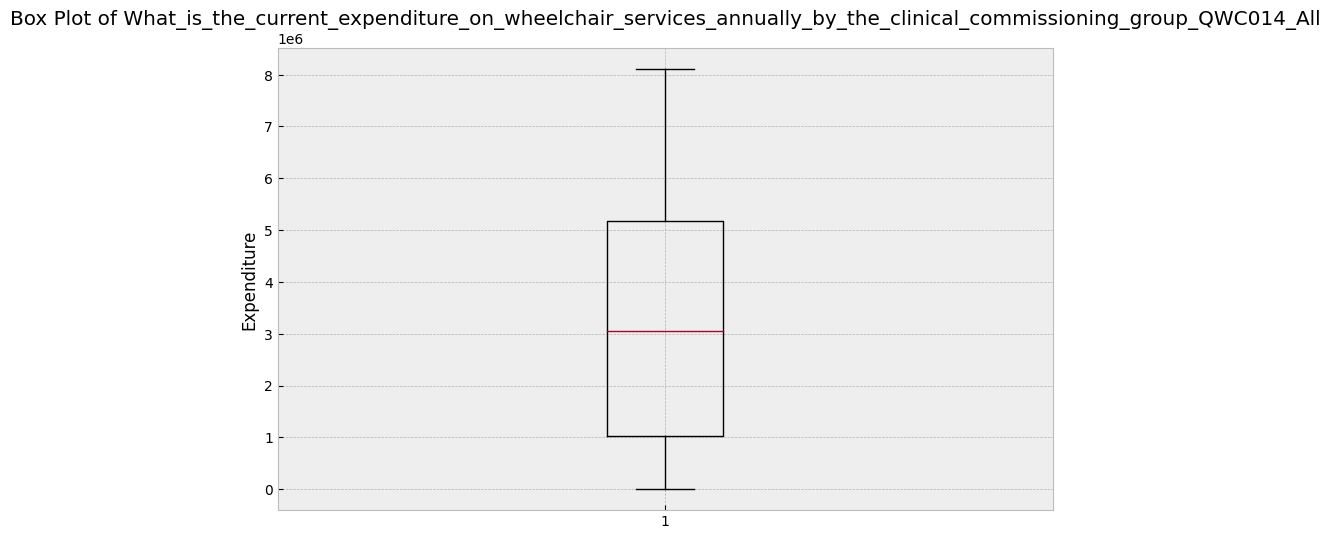

In [980]:
# column for plotting
column_to_plot = 'What_is_the_current_expenditure_on_wheelchair_services_annually_by_the_clinical_commissioning_group_QWC014_All'

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(data[column_to_plot])
plt.title(f'Box Plot of {column_to_plot}')
plt.ylabel('Expenditure')
plt.show()

In [981]:
# it seems there are zero values, lets slice and investigate 

zero_target = data[data['What_is_the_current_expenditure_on_wheelchair_services_annually_by_the_clinical_commissioning_group_QWC014_All'] == 0]
zero_target[['ICB_Code_Name','Region_Code_Name' ,'What_is_the_current_expenditure_on_wheelchair_services_annually_by_the_clinical_commissioning_group_QWC014_All']]

,ICB_Code_Name,Region_Code_Name,What_is_the_current_expenditure_on_wheelchair_services_annually_by_the_clinical_commissioning_group_QWC014_All
0,QE1 NHS LANCASHIRE AND SOUTH CUMBRIA INTEGRATE...,Y62 North West,0
7,QJ2 NHS DERBY AND DERBYSHIRE INTEGRATED CARE B...,Y60 Midlands,0
11,"QK1 NHS LEICESTER, LEICESTERSHIRE AND RUTLAND ...",Y60 Midlands,0
18,QNC NHS STAFFORDSHIRE AND STOKE-ON-TRENT INTEG...,Y60 Midlands,0
21,"QOC NHS SHROPSHIRE, TELFORD AND WREKIN INTEGRA...",Y60 Midlands,0
23,QOQ NHS HUMBER AND NORTH YORKSHIRE INTEGRATED ...,Y63 North East and Yorkshire,0
24,"QOX NHS BATH AND NORTH EAST SOMERSET, SWINDON ...",Y58 South West,0
28,QSL NHS SOMERSET INTEGRATED CARE BOARD,Y58 South West,0


* From the interpretation of this it seems that these groups did not submit data on expenditure
* We will not drop these rows since they make up a significant number of our 41 row dataset
* These zeros will be replaced by grouped by means of region code names

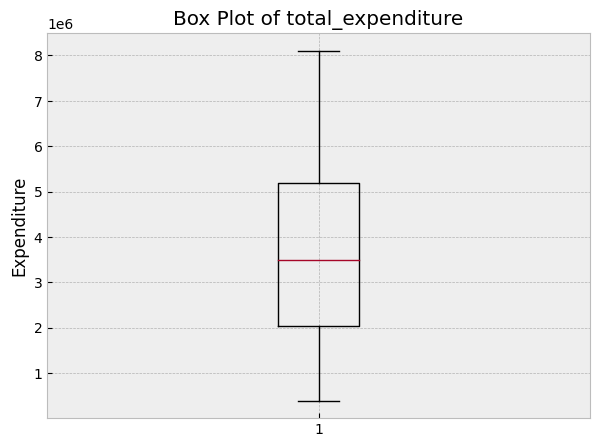

In [982]:
# Group by 'Region_Code_Name' and calculate the mean
grouped_means = data.groupby('Region_Code_Name')['What_is_the_current_expenditure_on_wheelchair_services_annually_by_the_clinical_commissioning_group_QWC014_All'].mean()

# Function to replace zeros with the grouped means
def replace_zeros_with_mean(row):
    if row['What_is_the_current_expenditure_on_wheelchair_services_annually_by_the_clinical_commissioning_group_QWC014_All'] == 0:
        return grouped_means[row['Region_Code_Name']]
    return row['What_is_the_current_expenditure_on_wheelchair_services_annually_by_the_clinical_commissioning_group_QWC014_All']

# Apply the function to replace zeros with means
data['What_is_the_current_expenditure_on_wheelchair_services_annually_by_the_clinical_commissioning_group_QWC014_All'] = data.apply(replace_zeros_with_mean, axis=1)

data.rename(columns= {'What_is_the_current_expenditure_on_wheelchair_services_annually_by_the_clinical_commissioning_group_QWC014_All': 'total_expenditure'}, inplace= True)

column_to_plot = 'total_expenditure'
plt.figure(figsize=(7, 5))
plt.boxplot(data[column_to_plot])
plt.title(f'Box Plot of {column_to_plot}')
plt.ylabel('Expenditure')
plt.show()

* ### `label encoding`

* We will use `one hot encoding` for the categorical features since our categories are nominal in that they have no inherent order or ranking between them

In [992]:
# Copy the original DataFrame
final_data = data.copy()

# Perform label encoding on object columns
label_encoder = LabelEncoder()
object_columns = final_data.select_dtypes(include=['object']).columns

for col in object_columns:
    final_data[col] = label_encoder.fit_transform(final_data[col])

# Convert boolean columns to integer (0 and 1)
final_data = final_data.astype(int)

final_data.rename(columns= {'Have_you_transitioned_from_a_voucher_system_to_personal_wheelchair_budgets_QWC015_All': 'voucher_to_personal_budget'}, inplace= True)
final_data.head()


,new_patients_re-referred_within_period_QWC003_AdultRegistered,new_patients_re-referred_within_period_QWC003_ChildRegistered,total_expenditure,voucher_to_personal_budget,Total_adults_registered,Total_children_registered,new_pat_closed_low_need,new_pat_closed_medium_need,new_pat_closed_high_need,new_pat_closed_specialist_need,new_pat_closed_modified_need,re_referred_low_need,re_referred_medium_need,re_referred_high_need,re_referred_specialist_need,re_referred_modified_need,ICB_Code_Name,Region_Code_Name
0,934,208,4575189,0,21559,2447,49,200,597,10,189,88,162,365,65,185,0,5
1,684,249,4622772,1,19100,1821,674,111,153,22,144,294,100,185,93,126,1,6
2,216,56,2530158,1,5734,1205,84,83,36,1,66,37,82,73,25,120,2,3
3,501,122,4544460,1,9918,1809,215,74,51,0,11,196,113,182,1,70,3,4
4,303,86,1899453,1,3336,648,9,27,55,11,145,10,21,77,5,126,4,4


* ### `Correlation of Features`

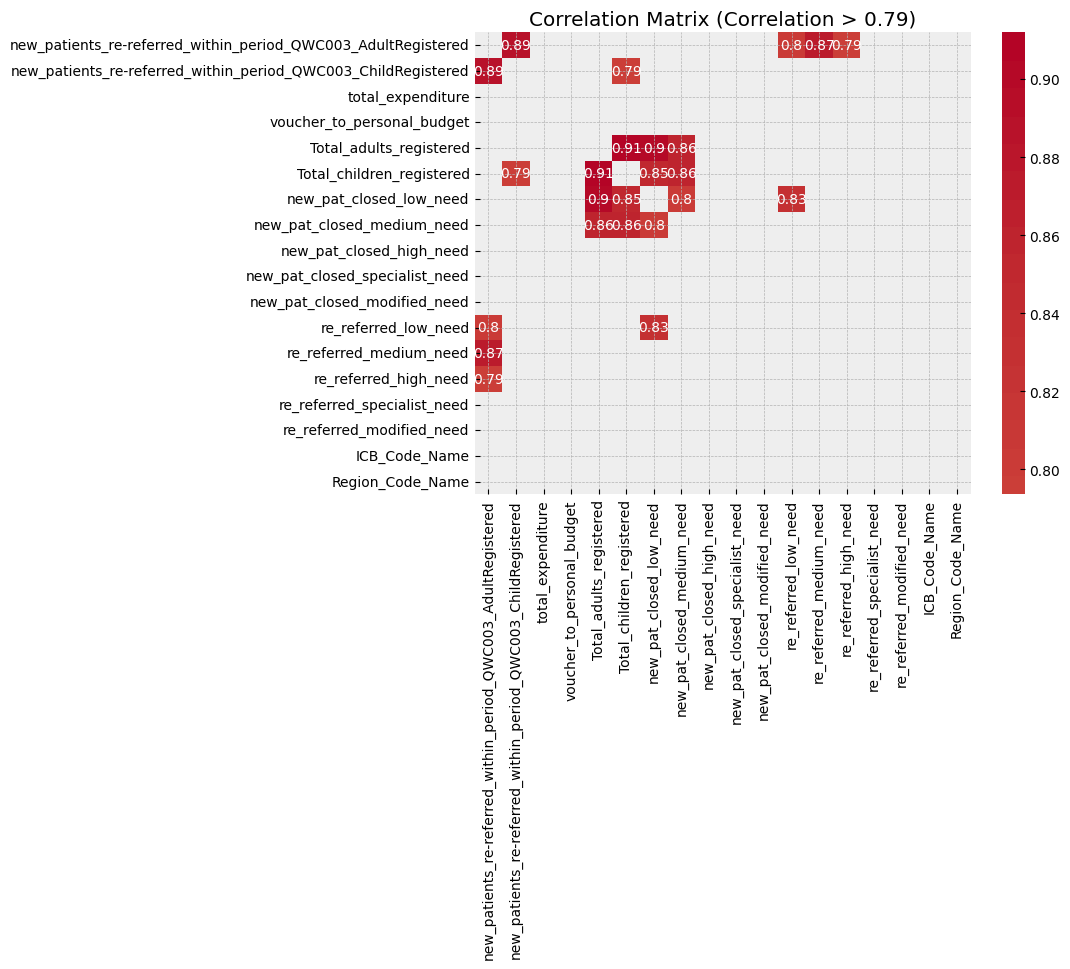

In [993]:
def matrix_corr(final_data):

    # Calculate the correlation matrix
    correlation_matrix = final_data.corr()

    # Filter the correlation matrix to keep only values > 0.79 in absolute value
    high_correlation_matrix = correlation_matrix[(correlation_matrix > 0.79) & (correlation_matrix != 1.0)]

    # Set up the matplotlib figure
    plt.figure(figsize=(8, 6))

    # Plot the correlation matrix using a heatmap
    sns.heatmap(high_correlation_matrix, annot=True, cmap="coolwarm", center=0)

    # Set the title of the plot
    plt.title("Correlation Matrix (Correlation > 0.79)")

    # Show the plot
    plt.show()
    
matrix_corr(final_data)

* It seems that our `total columns` and `new patients re-referred` have a high correlation with the rest of the dataset, these will have to be dropped also

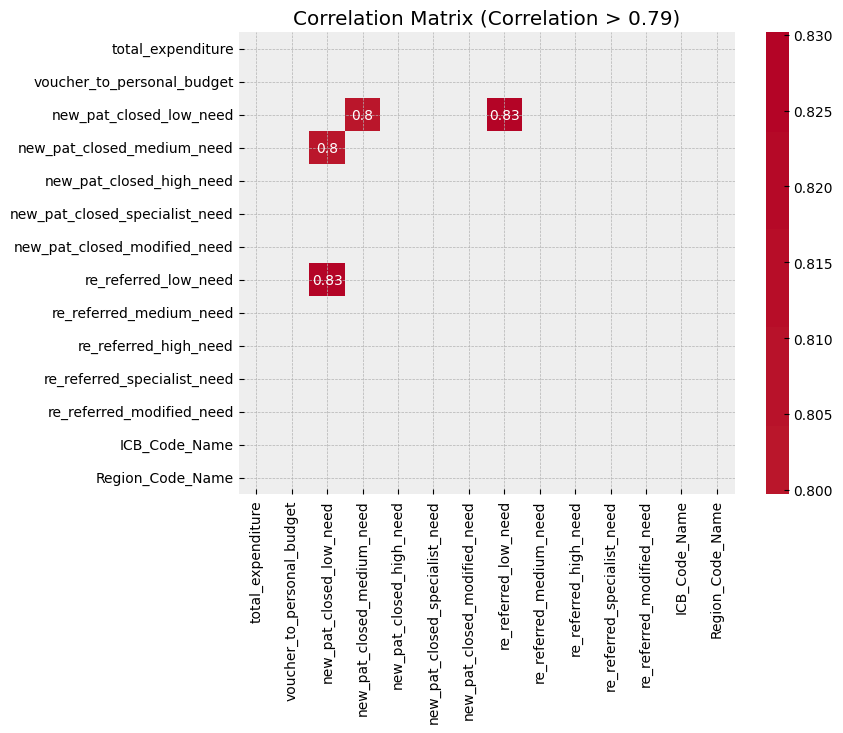

In [994]:
columns_to_drop = ['new_patients_re-referred_within_period_QWC003_AdultRegistered', 'new_patients_re-referred_within_period_QWC003_ChildRegistered', 'Total_adults_registered', 'Total_children_registered' ]

final_data.drop(columns=columns_to_drop, inplace=True)

matrix_corr(final_data)


>> ### 4.  MODELING

* This is a regression problem and we will use tree based classifiers to do our modelling

* We are using `RMAE (Root Mean Absolute Error)` instead of `RMSE (Root Mean Squared Error)` as our accuracy scoring metric because RMAE provides a more intuitive and easily interpretable measure of the prediction error. 
* While RMSE emphasizes larger errors due to the squaring operation, RMAE directly measures the average absolute difference between predicted and actual values in the same unit as the target variable.
* In our context of predicting wheelchair services and outcomes, using RMAE allows us to better understand the average magnitude of errors without the bias introduced by squaring errors.

In [1012]:
# selecting x and y 

X = final_data.drop(columns = 'total_expenditure')
y = final_data['total_expenditure']


Index(['voucher_to_personal_budget', 'new_pat_closed_low_need',
       'new_pat_closed_medium_need', 'new_pat_closed_high_need',
       'new_pat_closed_specialist_need', 'new_pat_closed_modified_need',
       're_referred_low_need', 're_referred_medium_need',
       're_referred_high_need', 're_referred_specialist_need',
       're_referred_modified_need', 'ICB_Code_Name', 'Region_Code_Name'],
      dtype='object')

### `Base Model`

In [1004]:
# Assuming you have defined X and Y earlier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

# Define the number of cross-validation folds
cv = 5

# Define the regression model
regressor = DecisionTreeRegressor(random_state=42)

# Create a pipeline with a standard scaler and the regression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', regressor)
])

# Define the function for training, testing, and scoring the model
def fit_train_score(model):

    start_time = time.time()

    model.fit(X_train, y_train)

    # Predicting with X_test
    y_test_pred = model.predict(X_test)

    # Calculate mean squared error on the training set
    y_train_pred = model.predict(X_train)
    mae_train = mean_absolute_error(y_train, y_train_pred)


    # Calculate mean squared error on the test set
    mae_test = mean_absolute_error(y_test, y_test_pred)


    # Calculate the elapsed time
    end_time = time.time()
    elapsed_time = end_time - start_time

    # Print the scores and information
    print(f"Testing time: {elapsed_time:.3f} seconds")

    print(f'root_Mean absolute Error (Train): {np.sqrt(mae_train):.3f}')
    print(f'root_Mean absolute Error (Test): {np.sqrt(mae_test):.3f}')

# Call the function with the pipeline
fit_train_score(pipeline)


Testing time: 0.017 seconds
root_Mean absolute Error (Train): 0.000
root_Mean absolute Error (Test): 1729.632


### `Random Forest Regressor Model`

In [1009]:


scaled_pipeline = Pipeline([('scaler' , StandardScaler()),
                            ('tree', RandomForestRegressor())])

# setting basic parameter
grid = [{'tree__criterion': ['absolute_error'], 
         'tree__max_features': ['sqrt', 'log2']}]

cv =10
random_tree = GridSearchCV(estimator=scaled_pipeline, 
                          param_grid= grid,
                          cv=5)

fit_train_score(random_tree)

Testing time: 2.231 seconds
root_Mean absolute Error (Train): 664.927
root_Mean absolute Error (Test): 1500.629


In [1010]:
random_tree.best_params_

{'tree__criterion': 'absolute_error', 'tree__max_features': 'sqrt'}

In [1011]:
# plotting witht the best parameters
scaled_pipeline = Pipeline([('scaler' , StandardScaler()),
                            ('tree', RandomForestRegressor())])

# setting basic parameter
grid = [{'tree__criterion': ['absolute_error'], 
         'tree__max_features': ['sqrt']}]

cv =10
random_tree = GridSearchCV(estimator=scaled_pipeline, 
                          param_grid= grid,
                          cv=5)

fit_train_score(random_tree)

Testing time: 2.505 seconds
root_Mean absolute Error (Train): 679.897
root_Mean absolute Error (Test): 1510.124


>> ### 5. Conclusion


- The project objectives have been successfully achieved through comprehensive analysis using advanced machine learning techniques, with both Decision Tree and Random Forest models yielding valuable insights.
- These models have effectively identified influential factors impacting individual decisions to engage with wheelchair services and outcomes in various English regions.
- Features influencing sign-ups and referrals were accurately captured, enhancing understanding of variable relationships.
- Specific patient groups that could benefit from targeted interventions were identified, enabling optimization of service delivery.
- Developed predictive models (Decision Tree and Random Forest) demonstrated accurate forecasting of patient sign-ups and referrals, as indicated by root Mean Absolute Error (MAE) values on test data.
- Project outcomes align well with initial objectives, offering actionable insights for improved accessibility and quality of wheelchair services across diverse regions.
- The best model was the `random Forest Regressor` with the least MAE

>> ### 6. Recommendations

1. **Tailored Interventions**:
   - Implement targeted interventions based on demographic insights to encourage sign-ups and referrals.
   - Personalize outreach efforts to specific age groups, regions, or demographics identified by the models.

2. **Resource Allocation Optimization**:
   - Allocate resources efficiently to ensure optimal support where needed.

3. **Continuous Monitoring and Improvement**:
   - Regularly update models with new data to maintain accuracy and relevance.
   - Refine features and variables if model performance deviates from expected levels.

4. **Collaboration with Experts**:
   - Collaborate with healthcare professionals to enhance models' understanding of patient dynamics.
   - Incorporate domain expertise to refine models' accuracy and practicality.

5. **Data Privacy and Ethics**:
   - Prioritize patient data privacy and comply with healthcare regulations.
   - Ensure anonymization and ethical use of patient information.

6. **Educational Initiatives**:
   - Launch awareness campaigns to educate patients on the benefits of wheelchair services.
   - Enhance understanding and encourage more sign-ups and referrals.

7. **Feedback Loop and Iterative Refinement**:
   - Establish a feedback mechanism to incorporate user insights and real-world observations.
   - Continuously assess model accuracy against actual outcomes and fine-tune accordingly.

